In [1]:
## Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
warnings.filterwarnings('ignore')

In [2]:
airbnb = pd.read_csv('listings.csv')
pd.set_option('display.max_columns', len(airbnb.columns)) # To view all columns

In [3]:
airbnb.shape#melihat banyak row dan  kolom

(3585, 95)

In [4]:
airbnb.duplicated().sum()
airbnb.drop_duplicates(inplace=True)

In [5]:
airbnb.isna().sum().sort_values(ascending=False)

has_availability                3585
license                         3585
neighbourhood_group_cleansed    3585
jurisdiction_names              3585
square_feet                     3529
                                ... 
is_location_exact                  0
room_type                          0
accommodates                       0
bed_type                           0
country                            0
Length: 95, dtype: int64

In [6]:
airbnb

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

# Features Use

neighbourhood__cleansed : lokasi listing tersebut berada/ distrik. 

property_type : tipe properti dari listing. exp: House/ Apartment/ ...

room_type: tipe ruangan dari listing (Entire home/apt, Private room, or Shared room).

accommodates : jumlah orang yang listing dapat akomodasikan.

bathrooms: jumlah bathrooms

bedrooms: jumlah bedrooms

beds: jumlah tempat tidur

amenities : perlengkapan yang ditawarkan host untuk pengunjungnya. exp: Air Conditioning, Refrigerator, Wifi, ....

cleaning_fee : biaya yang ditentukan host untuk bersih-bersih.

security_deposit : biaya deposit yang ditentukan host untuk keamanan. Apabila ada terjadi sesuatu, uang tersebut digunakan untuk membayarnya. exp: setrika dirusak pengunjung, maka biaya ganti rugi ditanggung deposit ini. Apabila tidak ada apa-apa, uang akan dikembalikan saat selesai menginap.

minimum_nights : minimum hari

availability_365 : jumlah ketersediaan listing per hari dalam setahun

guests_included : jumlah perkiraan dapat menampung tamu. ada denda bila melebihi yang ditentukan

cancellation_policy : kebijakan pembatalan, biasanya ada maksimum hari untuk pembatalan apabila ingin refund. 7 hari sebelum tanggal menginap. bila lebih dari itu maka uang tidak bisa dikembalikan

price : harga listing

instant_bookable : apakah cara pemesanan property kepada hostnya dapat secara langsung atau membutuhkan persetujuan terlebih dahulu sebelum melakukan pemesanan

extra_people : harga per tamu tambahan di atas harga yang termasuk tamu


In [7]:
columns_use = ['neighbourhood_cleansed',
                   'property_type', 'room_type', 'accommodates', 'bathrooms', 'instant_bookable',  
                   'bedrooms', 'bed_type','beds','amenities', 'price', 'cleaning_fee','availability_30',
               'availability_60','availability_90','availability_365','guests_included','extra_people',
               'security_deposit','minimum_nights', 'cancellation_policy']

df = airbnb[columns_use]

In [8]:
df.head(5)

,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,instant_bookable,bedrooms,bed_type,beds,amenities,price,cleaning_fee,availability_30,availability_60,availability_90,availability_365,guests_included,extra_people,security_deposit,minimum_nights,cancellation_policy
0,Roslindale,House,Entire home/apt,4,1.5,f,2.0,Real Bed,3.0,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",$250.00,$35.00,0,0,0,0,1,$0.00,NaN,2,moderate
1,Roslindale,Apartment,Private room,2,1.0,t,1.0,Real Bed,1.0,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$65.00,$10.00,26,54,84,359,0,$0.00,$95.00,2,moderate
2,Roslindale,Apartment,Private room,2,1.0,f,1.0,Real Bed,1.0,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",$65.00,NaN,19,46,61,319,1,$20.00,NaN,3,moderate
3,Roslindale,House,Private room,4,1.0,f,1.0,Real Bed,2.0,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$75.00,$50.00,6,16,26,98,2,$25.00,$100.00,1,moderate
4,Roslindale,House,Private room,2,1.5,f,1.0,Real Bed,2.0,"{Internet,""Wireless Internet"",""Air Conditionin...",$79.00,$15.00,13,34,59,334,1,$0.00,NaN,2,flexible


In [9]:
df.isnull().sum()
df.info() #.info() function is used to get a concise summary of the dataframedf

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3585 entries, 0 to 3584
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  3585 non-null   object 
 1   property_type           3582 non-null   object 
 2   room_type               3585 non-null   object 
 3   accommodates            3585 non-null   int64  
 4   bathrooms               3571 non-null   float64
 5   instant_bookable        3585 non-null   object 
 6   bedrooms                3575 non-null   float64
 7   bed_type                3585 non-null   object 
 8   beds                    3576 non-null   float64
 9   amenities               3585 non-null   object 
 10  price                   3585 non-null   object 
 11  cleaning_fee            2478 non-null   object 
 12  availability_30         3585 non-null   int64  
 13  availability_60         3585 non-null   int64  
 14  availability_90         3585 non-null   

In [10]:
df.describe()

,accommodates,bathrooms,bedrooms,beds,availability_30,availability_60,availability_90,availability_365,guests_included,minimum_nights
count,3585.000000,3571.000000,3575.000000,3576.000000,3585.00000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000
mean,3.041283,1.221647,1.255944,1.609060,8.64993,21.833194,38.558159,179.346444,1.429847,3.171269
std,1.778929,0.501487,0.753060,1.011745,10.43533,21.860966,33.158272,142.136180,1.056787,8.874133
min,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,19.000000,1.000000,1.000000
50%,2.000000,1.000000,1.000000,1.000000,4.00000,16.000000,37.000000,179.000000,1.000000,2.000000
75%,4.000000,1.000000,2.000000,2.000000,15.00000,40.000000,68.000000,325.000000,1.000000,3.000000
max,16.000000,6.000000,5.000000,16.000000,30.00000,60.000000,90.000000,365.000000,14.000000,300.000000


In [11]:
df.columns

Index(['neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'instant_bookable', 'bedrooms', 'bed_type', 'beds',
       'amenities', 'price', 'cleaning_fee', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'guests_included', 'extra_people', 'security_deposit', 'minimum_nights',
       'cancellation_policy'],
      dtype='object')

**Cleaning individual columns**

__*property_type*__

Beberapa pembersihan jenis properti diperlukan karena ada banyak kategori dengan hanya beberapa daftar. Kategori "Apartemen", "Rumah" dan "Lainnya" akan digunakan, karena sebagian besar properti dapat diklasifikasikan sebagai apartemen atau rumah.

In [12]:
df.property_type.value_counts()

Apartment          2612
House               562
Condominium         231
Townhouse            54
Bed & Breakfast      41
Loft                 39
Other                17
Boat                 12
Villa                 6
Entire Floor          4
Dorm                  2
Camper/RV             1
Guesthouse            1
Name: property_type, dtype: int64

In [13]:
# Replacing categories that are types of houses or apartments
df.property_type.replace({
    'Townhouse': 'House',
    'Loft': 'Apartment',
    'Villa': 'House',
    }, inplace=True)

# Replacing other categories with 'other'
df.loc[~df.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Other'

__*bathrooms, bedrooms, bed_type and beds*__

Missing values will be replaced with median to avoid strange fractions.

In [14]:
for col in ['bathrooms', 'bedrooms', 'beds']:
    df[col].fillna(df[col].median(), inplace=True)

__*amenities*__

"Amenities" is a list of additional features in the property, i.e. whether it has a TV or parking. 

In [15]:
df.amenities[:1].values

array(['{TV,"Wireless Internet",Kitchen,"Free Parking on Premises","Pets live on this property",Dog(s),Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Fire Extinguisher",Essentials,Shampoo,"Laptop Friendly Workspace"}'],
      dtype=object)

In [16]:
# Creating a set of possible amenities
amenities_list = list(df.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)

Dalam daftar di atas, beberapa fasilitas lebih penting dari pada yang lain, dan beberapa mungkin tidak biasa. Fasilitas akan diekstraksi berdasarkan penelitian singkat tentang fasilitas mana yang dipertimbangkan oleh host yang ingin rental harga, pilihan yang lebih penting, serta pengalaman pribadi. Ini akan diselidiki lebih lanjut di bagian EDA. Misalnya, jika ternyata hampir semua properti memiliki / tidak memiliki fasilitas tertentu, fitur tersebut tidak akan berguna untuk membantu menjelaskan perbedaan harga.

In [17]:
df.loc[df['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
df.loc[df['amenities'].str.contains('Air conditioning'), 'air_conditioning'] = 1
df.loc[df['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
df.loc[df['amenities'].str.contains('Buzzer/Wireless Intercom|Cable TV'), 'high_end_electronics'] = 1
df.loc[df['amenities'].str.contains('Carbon Monoxide Detector|Smoke Detector'), 'smoke_detector'] = 1
df.loc[df['amenities'].str.contains('Cat(s)|Pets|Other pet(s)|Pets Allowed|Dog(s)|Pets live on this property'), 'pets_allowed'] = 1
df.loc[df['amenities'].str.contains('Doorman|Safety Card'), 'secure'] = 1
df.loc[df['amenities'].str.contains('Washer / Dryer|Dryer|Washer'), 'washing_machine'] = 1
df.loc[df['amenities'].str.contains('Indoor Fireplace|Heating'), 'heating'] = 1
df.loc[df['amenities'].str.contains('Hot Tub'), 'Hot_Tub'] = 1
df.loc[df['amenities'].str.contains('Hair Dryer'), 'hair_dryer'] = 1
df.loc[df['amenities'].str.contains('Hangers'), 'hangers'] = 1
df.loc[df['amenities'].str.contains('Elevator in Building'), 'elevator'] = 1
df.loc[df['amenities'].str.contains('Family/kid friendly'), 'child_friendly'] = 1
df.loc[df['amenities'].str.contains('Fire Extinguisher'), 'fire_extinguisher'] = 1
df.loc[df['amenities'].str.contains('Free Parking on Premises|Free Parking on Street'), 'free_parking'] = 1
df.loc[df['amenities'].str.contains('Gym'), 'gym'] = 1
df.loc[df['amenities'].str.contains('TV'), 'tv'] = 1
df.loc[df['amenities'].str.contains('Kitchen'), 'kitchen'] = 1
df.loc[df['amenities'].str.contains('Laptop Friendly Workspace'), 'workspace'] = 1
df.loc[df['amenities'].str.contains('Lock on Bedroom Door'), 'room_key'] = 1
df.loc[df['amenities'].str.contains('Paid Parking Off Premises'), 'paid_parking'] = 1
df.loc[df['amenities'].str.contains('Pool'), 'pool'] = 1
df.loc[df['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
df.loc[df['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1
df.loc[df['amenities'].str.contains('Wheelchair Accessible'), 'wheelchair_access'] = 1
df.loc[df['amenities'].str.contains('Internet|Wireless Internet'), 'internet'] = 1
df.loc[df['amenities'].str.contains('First Aid Kit'), 'firstAid_kit'] = 1

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3585 entries, 0 to 3584
Data columns (total 49 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  3585 non-null   object 
 1   property_type           3585 non-null   object 
 2   room_type               3585 non-null   object 
 3   accommodates            3585 non-null   int64  
 4   bathrooms               3585 non-null   float64
 5   instant_bookable        3585 non-null   object 
 6   bedrooms                3585 non-null   float64
 7   bed_type                3585 non-null   object 
 8   beds                    3585 non-null   float64
 9   amenities               3585 non-null   object 
 10  price                   3585 non-null   object 
 11  cleaning_fee            2478 non-null   object 
 12  availability_30         3585 non-null   int64  
 13  availability_60         3585 non-null   int64  
 14  availability_90         3585 non-null   

Salah satu cara untuk mengurangi jumlah fitur adalah dengan menghapus fasilitas yang menambahkan informasi relatif sedikit, atau relatif tidak membantu dalam membedakan antara daftar yang berbeda. Fitur fasilitas yang kategori benar atau salah berisi kurang dari 50% listingan akan dihapus.

In [19]:
df.iloc[:,21:]

,check_in_24h,air_conditioning,breakfast,high_end_electronics,smoke_detector,pets_allowed,secure,washing_machine,heating,Hot_Tub,hair_dryer,hangers,elevator,child_friendly,fire_extinguisher,free_parking,gym,tv,kitchen,workspace,room_key,paid_parking,pool,smoking_allowed,event_suitable,wheelchair_access,internet,firstAid_kit
0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0
3,NaN,NaN,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
4,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3581,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,NaN,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = df.iloc[:,21:].columns
df[cols_to_replace_nulls] = df[cols_to_replace_nulls].fillna(0)

infrequent_amenities = []
for col in df.iloc[:,21:].columns:
    if df[col].sum() < len(df)/50:
        infrequent_amenities.append(col)
print(infrequent_amenities)

# Dropping infrequent amenity features
df.drop(infrequent_amenities, axis=1, inplace=True)

# Dropping the original amenity feature
df.drop('amenities', axis=1, inplace=True)

['check_in_24h', 'air_conditioning', 'child_friendly', 'paid_parking', 'smoking_allowed', 'event_suitable']


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3585 entries, 0 to 3584
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  3585 non-null   object 
 1   property_type           3585 non-null   object 
 2   room_type               3585 non-null   object 
 3   accommodates            3585 non-null   int64  
 4   bathrooms               3585 non-null   float64
 5   instant_bookable        3585 non-null   object 
 6   bedrooms                3585 non-null   float64
 7   bed_type                3585 non-null   object 
 8   beds                    3585 non-null   float64
 9   price                   3585 non-null   object 
 10  cleaning_fee            2478 non-null   object 
 11  availability_30         3585 non-null   int64  
 12  availability_60         3585 non-null   int64  
 13  availability_90         3585 non-null   int64  
 14  availability_365        3585 non-null   

**penjelasan Fasilitas yang di pilih untuk fitur**

*breakfast : tersedia fasilitas sarapan

*high_end_electronics : tersedia alat elektronik yang bagus, contoh : tv kabel

*smoke_detector : tersedia detektor merokok

*pets_allowed : hewan bisa tinggal

*secure : tersedia keamanan

*washing_machine : memiliki mesin cuci

*heating : memiliki pemanas ruangan

*Hot_Tub : memiliki bak mandi air panas

*hair_dryer : memiliki hair dryer

*hangers : memiliki hanger

*elevator : tersedia elevator

*fire_extinguisher : tersedia pemadam kebakaran

*free_parking : parkir gratis

*gym : tesedia gym

*tv : memiliki tv

*kitchen : tersedia dapur

*workspace : tersedia ruang bekerja

*room_key : kunci kamar 

*pool : tersedia kolam renang

*wheelchair_access : bisa di lalui oleh kursi roda

*internet : tersedia internet

*firstAid_kit : tersedia obat-obatan pertolongan pertama


__*security_deposit, cleaning_fee, extra_people*__

Kolom ini juga akan diubah menjadi integer.
Memiliki nilai yang hilang secara fungsional sama dengan memiliki uang jaminan atau biaya $ 0, jadi nilai yang hilang akan diganti dengan 0.

In [22]:
df.security_deposit = df.security_deposit.str[1:-3]
df.security_deposit = df.security_deposit.str.replace(",", "")
df.security_deposit.fillna(0, inplace=True)
df.security_deposit = df.security_deposit.astype('int64')

In [23]:
df.cleaning_fee = df.cleaning_fee.str[1:-3]
df.cleaning_fee = df.cleaning_fee.str.replace(",", "")
df.cleaning_fee.fillna(0, inplace=True)
df.cleaning_fee = df.cleaning_fee.astype('int64')

In [24]:
df.extra_people = df.extra_people.str[1:-3]
df.extra_people = df.extra_people.str.replace(",", "")
df.extra_people.fillna(0, inplace=True)
df.extra_people = df.extra_people.astype('int64')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3585 entries, 0 to 3584
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  3585 non-null   object 
 1   property_type           3585 non-null   object 
 2   room_type               3585 non-null   object 
 3   accommodates            3585 non-null   int64  
 4   bathrooms               3585 non-null   float64
 5   instant_bookable        3585 non-null   object 
 6   bedrooms                3585 non-null   float64
 7   bed_type                3585 non-null   object 
 8   beds                    3585 non-null   float64
 9   price                   3585 non-null   object 
 10  cleaning_fee            3585 non-null   int64  
 11  availability_30         3585 non-null   int64  
 12  availability_60         3585 non-null   int64  
 13  availability_90         3585 non-null   int64  
 14  availability_365        3585 non-null   

__*cancellation_policy*__

Cleaning of cancellation policy types is required, so that we can categorise the four small categories into three larger categories (e.g. the super strict options are only available to long-term Airbnb hosts, and is invitation only).

In [26]:
df.cancellation_policy.value_counts()

strict             1582
flexible            999
moderate            919
super_strict_30      85
Name: cancellation_policy, dtype: int64

In [27]:
# Replace categories
df.cancellation_policy.replace({'super_strict_30': 'strict'}, inplace=True)

#### Availability columns

saya membahas fitur yang menjelaskan ketersediaan pemesanan umum dari daftar tertentu dalam 30, 60, 90, atau 365 hari terakhir, yaitu: **availability_30, availability_60,availability_90, availability_365**.  

In [28]:
availabilities = df[['availability_30', 'availability_60',
       'availability_90', 'availability_365']]

In [29]:
availabilities[availabilities['availability_365'] < 36.5].head(20)

,availability_30,availability_60,availability_90,availability_365
0,0,0,0,0
12,0,0,0,0
17,0,0,0,0
23,0,0,0,0
24,0,0,0,0
25,0,0,0,1
32,0,0,3,17
41,0,0,0,0
59,0,0,0,0
62,0,0,0,0


<AxesSubplot:>

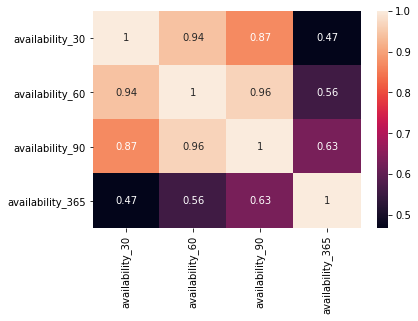

In [30]:
sns.heatmap(availabilities.corr(), annot=True)

Berdasarkan histogram, plot korelasi, dan kasus ketika ketersediaan kecil secara umum (menyebabkan banyak duplikasi), saya memutuskan untuk hanya menyimpan kolom ** availability_365 ** karena berisi informasi tentang kemungkinan pemesanan selama periode waktu terbesar.

In [31]:
df.drop([ 'availability_30', 'availability_60',
       'availability_90'],axis=1,inplace=True)

### Target variable exploration

In [32]:
df['price']

0       $250.00
1        $65.00
2        $65.00
3        $75.00
4        $79.00
         ...   
3580     $69.00
3581    $150.00
3582    $198.00
3583     $65.00
3584     $65.00
Name: price, Length: 3585, dtype: object

In [33]:
df['price'].unique()

array(['$250.00', '$65.00', '$75.00', '$79.00', '$100.00', '$58.00',
       '$229.00', '$60.00', '$57.00', '$93.00', '$150.00', '$145.00',
       '$165.00', '$49.00', '$40.00', '$120.00', '$70.00', '$175.00',
       '$95.00', '$90.00', '$67.00', '$55.00', '$200.00', '$110.00',
       '$115.00', '$125.00', '$78.00', '$50.00', '$45.00', '$85.00',
       '$89.00', '$285.00', '$140.00', '$80.00', '$63.00', '$46.00',
       '$62.00', '$69.00', '$73.00', '$61.00', '$27.00', '$190.00',
       '$149.00', '$168.00', '$205.00', '$117.00', '$429.00', '$267.00',
       '$87.00', '$300.00', '$119.00', '$195.00', '$210.00', '$500.00',
       '$130.00', '$450.00', '$399.00', '$350.00', '$99.00', '$295.00',
       '$107.00', '$76.00', '$59.00', '$88.00', '$164.00', '$185.00',
       '$105.00', '$319.00', '$53.00', '$199.00', '$114.00', '$180.00',
       '$92.00', '$84.00', '$275.00', '$230.00', '$192.00', '$170.00',
       '$240.00', '$225.00', '$178.00', '$109.00', '$383.00', '$184.00',
       '$299.

In [34]:
df['price'] = df['price'].str.replace("$","").str.replace(",","").astype(float)

In [35]:
df['price'].describe()

count    3585.000000
mean      173.925802
std       148.331321
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price, dtype: float64

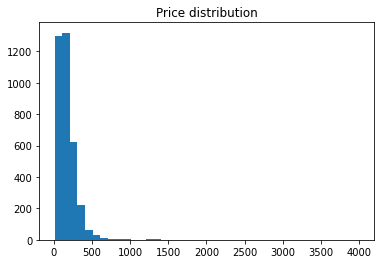

In [36]:
plt.hist(df['price'], bins=40)
plt.title('Price distribution')
plt.show()

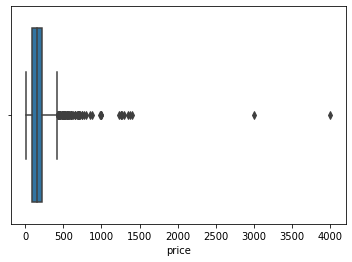

In [37]:
sns.boxplot(df['price'])
plt.show()

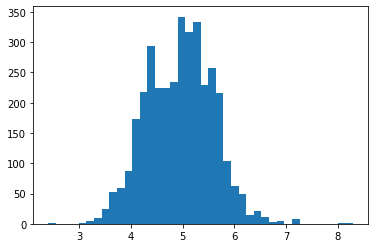

In [38]:
df['log_price'] = np.log1p(df['price'])
plt.hist(df['log_price'], bins=40)
plt.show()

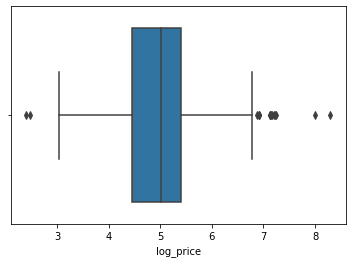

In [39]:
sns.boxplot(df['log_price'])
plt.show()

In [40]:
df.to_csv('listings_cleaned.csv', index=False)